<h1>Eric Liu Final (for MATH-251)</h1>
<p>Here is the auxiliary code for Final</p>
<p>Part of the codes are in .m files (one question for one .m file), other codes are in this ipynb file (all questions in one file)</p>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from math import *



<h2>PART 1: Regression</h2>


The minimum error is: 28.560000000000006 with corresponding (a, b) = (0.6, -0.8)


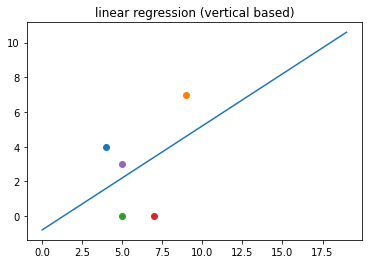

In [72]:
# vertical case (original problem)
p = 5
X = np.array([[4, 4], [9, 7], [5, 0], [7, 0], [5, 3]])

dic_t = {}
for a in range(-500, 500, 2):
    a_val = a / 10
    for b in range(-500, 500, 2):
        b_val = b / 10
        summ = 0
        for i in range(5):
            summ += abs(X[i][1] - (a_val*X[i][0] + b_val)) ** 2
        dic_t[a_val, b_val]= summ
print("The minimum error is:", min(dic_t.values()), "with corresponding (a, b) =",  min(dic_t, key = dic_t.get))

x_hori = np.arange(0, 20)
y_hori = min(dic_t, key = dic_t.get)[0] * x_hori + min(dic_t, key = dic_t.get)[1]
plt.plot(x_hori, y_hori)
for i in range(p):
    plt.scatter(X[i][0], X[i][1])
plt.title("linear regression (vertical based)")
plt.show()

<p>Challenge 1: horizontal case 

/var/folders/nk/5m0_xj5n1xz1wr8rm0qx1z6c0000gp/T/ipykernel_21302/1256726916.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  summ += abs(X[i][0] - ((X[i][1] - b_val) / a_val)) ** 2
/var/folders/nk/5m0_xj5n1xz1wr8rm0qx1z6c0000gp/T/ipykernel_21302/1256726916.py:11: RuntimeWarning: invalid value encountered in double_scalars
  summ += abs(X[i][0] - ((X[i][1] - b_val) / a_val)) ** 2


The minimum error is: 13.1280276816609 with corresponding (a, b) = (3.4, -17.6)


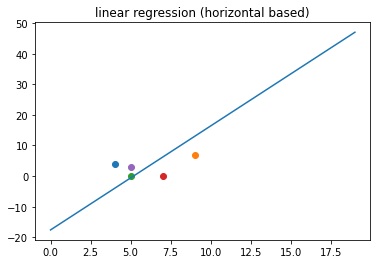

In [71]:
p = 5
X = np.array([[4, 4], [9, 7], [5, 0], [7, 0], [5, 3]])

dic_t = {}
for a in range(-500, 500, 2):
    a_val = a / 10
    for b in range(-500, 500, 2):
        b_val = b / 10
        summ = 0
        for i in range(5):
            summ += abs(X[i][0] - ((X[i][1] - b_val) / a_val)) ** 2
        dic_t[a_val, b_val]= summ
print("The minimum error is:", min(dic_t.values()), "with corresponding (a, b) =",  min(dic_t, key = dic_t.get))

x_hori = np.arange(0, 20)
y_hori = min(dic_t, key = dic_t.get)[0] * x_hori + min(dic_t, key = dic_t.get)[1]
plt.plot(x_hori, y_hori)
for i in range(p):
    plt.scatter(X[i][0], X[i][1])
plt.title("linear regression (horizontal based)")
plt.show()

<p>Challenge 2: t-distance case 

The minimum error is: 20.53333333333333 with corresponding (a, b) = (1.0, -3.2) in direction: (1/12)*pi


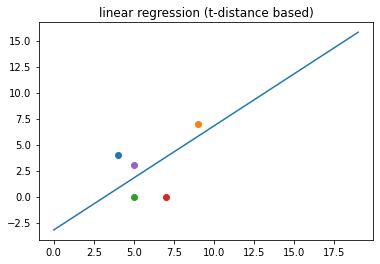

The minimum error is: 15.560041837576186 with corresponding (a, b) = (1.4, -5.6) in direction: (2/12)*pi


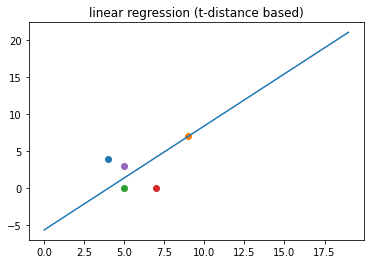

The minimum error is: 12.91836734693877 with corresponding (a, b) = (1.8, -8.0) in direction: (3/12)*pi


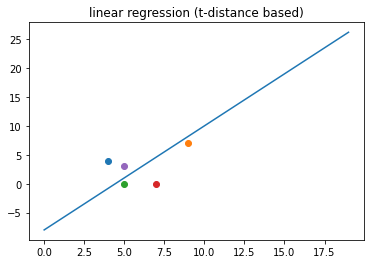

The minimum error is: 11.795502449200821 with corresponding (a, b) = (2.2, -10.4) in direction: (4/12)*pi


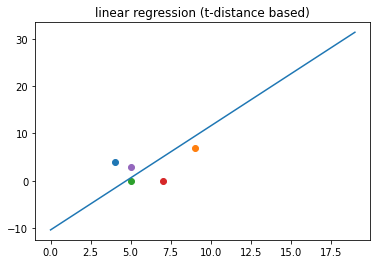

The minimum error is: 11.852773598492607 with corresponding (a, b) = (2.6, -12.8) in direction: (5/12)*pi


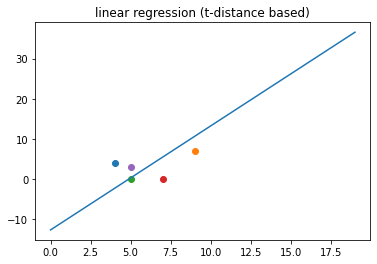

The minimum error is: 13.128027681660898 with corresponding (a, b) = (3.4, -17.6) in direction: (6/12)*pi


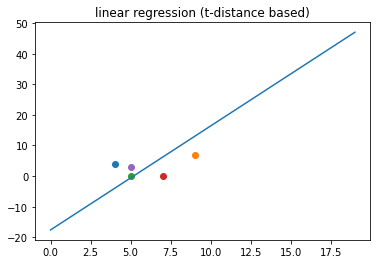

The minimum error is: 16.00526836045405 with corresponding (a, b) = (5.6, -30.8) in direction: (7/12)*pi


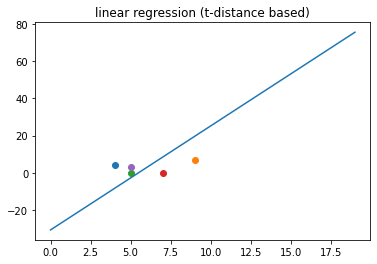

The minimum error is: 21.649815810303362 with corresponding (a, b) = (8.8, -50.0) in direction: (8/12)*pi


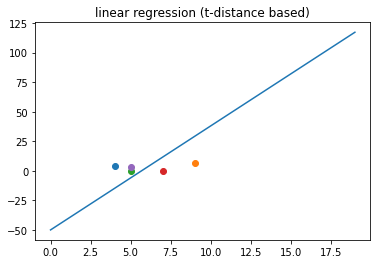

The minimum error is: 29.662721893491124 with corresponding (a, b) = (-4.2, 28.0) in direction: (9/12)*pi


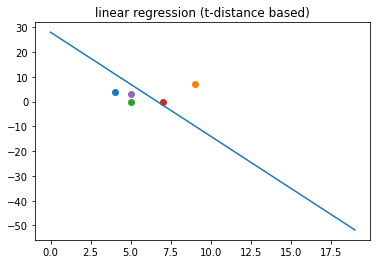

The minimum error is: 37.94160564824699 with corresponding (a, b) = (-1.0, 8.8) in direction: (10/12)*pi


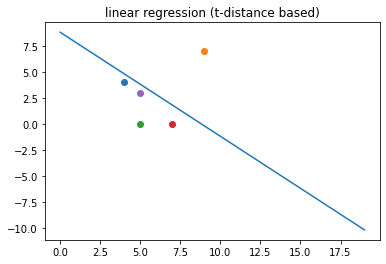

The minimum error is: 37.298527586412284 with corresponding (a, b) = (0.0, 2.8) in direction: (11/12)*pi


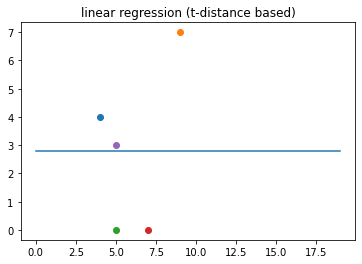

In [45]:
p = 5
X = np.array([[4, 4], [9, 7], [5, 0], [7, 0], [5, 3]])

# The idea is that
# we iterate two constants: a and b
# for each combination of a and b will form a line, 
# given certain direction (horizontal or t-distance), we calculate the sum of distance of each point to the line in this direction

def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       #raise Exception('lines do not intersect')
       return (1e4, 1e4) # this direction is parallel to the current line with y = ax + b

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

def find_distance(pointA, pointB):
    return sqrt((abs(pointA[0]-pointB[0])) ** 2 + (abs(pointA[1]-pointB[1])) ** 2)

for t in range(1,12):
    t_val = (t/12) * pi
    dic_t = {}
    for a in range(-500, 500, 2):
        a_val = a / 10
        for b in range(-500, 500, 2):
            b_val = b / 10
            summ = 0
            for i in range(5):
                # (A, B) are points on l: y = ax + b 
                # (C, D) are points on l in t-direction crossing certain data point
                A = (0 , b_val)
                B = (1, a_val + b_val)
                C = (X[i][0], X[i][1])
                D = (X[i][0]+1, X[i][1]-1/tan(t_val))
                point = line_intersection((A, B), (C, D))
                distance = find_distance(X[i], point)
                summ += distance**2
            dic_t[a_val, b_val]= summ
    print("The minimum error is:", min(dic_t.values()), "with corresponding (a, b) =",  min(dic_t, key = dic_t.get), "in direction: ("+str(t)+"/12)*pi")

    x_hori = np.arange(0, 20)
    y_hori = min(dic_t, key = dic_t.get)[0] * x_hori + min(dic_t, key = dic_t.get)[1]
    plt.plot(x_hori, y_hori)
    for i in range(p):
        plt.scatter(X[i][0], X[i][1])
    plt.title("linear regression (t-distance based)")
    plt.show()


<p>Challenge 3: SVD</p>

The minimum error is: 11.71164510166359 with corresponding (a, b) = (2.1, -9.8)


Text(0.5, 1.0, 'linear regression (closest-distance based)')

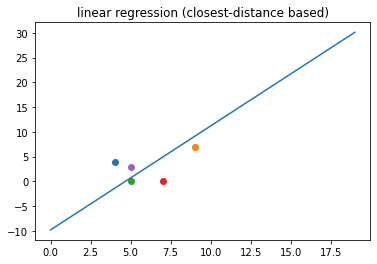

In [37]:
# the idea is to find the shortest distance of each point to the line
# which means it's the perpendicular distance to the line
dic_svd = {}
for a in range(-100, 100):
    a_val = a / 10
    for b in range(-100, 100):
        b_val = b / 10
        summ = 0
        for i in range(5):
            distance = abs((a_val * X[i][0] + (-1) * X[i][1] + b_val)) / (sqrt(a_val * a_val + (-1) * (-1))) # linear algebric way to calculate the shortest distance
            summ += distance ** 2
        dic_svd[a_val, b_val]= summ
print("The minimum error is:", min(dic_svd.values()), "with corresponding (a, b) =",  min(dic_svd, key = dic_svd.get))

x_hori = np.arange(0, 20)
y_hori = min(dic_svd, key = dic_svd.get)[0] * x_hori + min(dic_svd, key = dic_svd.get)[1]
plt.plot(x_hori, y_hori)
for i in range(p):
    plt.scatter(X[i][0], X[i][1])
plt.title("linear regression (closest-distance based)")

<h2>Part 2: Newton's Method

<p>Base e case

In [98]:
def f(x):
    return 1 + 2*sin(2*pi*log(x)/log(2))*log(2)/(2*pi)

def fd(x):
    return (2/x) * cos(2*pi*log(x)/log(2))    #define f'(x) 

def newton_method(n,assum):
    time = n
    x = assum
    Next = 0
    A = f(x)
    B = fd(x)
    if f(x) == 0.0:
        return time
    else:
        Next = x - A/B
    if (abs(A) < 1e-6) or (n>1000): #  6-digit percision
        if n > 1000:
            print("Newton's method does not converge in 1000 times.")
        else:
            print('Under 6-digit percision, it converges with final x= ', Next)
            print("Convergence Time =", time)
    else:
        if (n % 100) == 0:
            print("When time =",n ,"--> x is:", Next)
        return newton_method(n+1,Next) # call recursion
print("From the graph we know this funtion (base e) do not have a root. But now we apply newton's method")
newton_method(0,1)

From the graph we know this funtion (base e) do not have a root. But now we apply newton's method
When time = 0 --> x is: 0.5
When time = 100 --> x is: 3.9443045261050126e-31
When time = 200 --> x is: 3.11150763893106e-61
When time = 300 --> x is: 2.4545467326494437e-91
When time = 400 --> x is: 1.9362959574241767e-121
When time = 500 --> x is: 1.5274681817489646e-151
When time = 600 --> x is: 1.2049599325494359e-181
When time = 700 --> x is: 9.505457831462591e-212
When time = 800 --> x is: 7.49848406947422e-242
When time = 900 --> x is: 5.915260930829866e-272
When time = 1000 --> x is: 4.666318092511211e-302
Newton's method does not converge in 1000 times.


<p>Base 1.1 case

In [100]:
def f(x):
    return 1 + 2*sin(2*pi*log(x, 1.1)/log(2, 1.1))*log(2, 1.1)/(2*pi)

def fd(x):
    return (2/x) * cos(2*pi*log(x, e)/log(2, e)) /log(1.1, e)    #define f'(x) 

def newton_method(n,assum):
    time = n
    x = assum
    Next = 0
    A = f(x)
    B = fd(x)
    if f(x) == 0.0:
        return time
    else:
        Next = x - A/B
    if (abs(A) < 1e-6) or (n>1000): #  6-digit percision
        if n > 1000:
            print("Newton's method does not converge in 1000 times.")
        else:
            print('Under 6-digit percision, it converges with final x= ', Next)
            print("Convergence Time =", time)
    else:
        print("When time =",n ,"--> x is:", Next)
        return newton_method(n+1,Next) # call recursion
print("From the graph we know this funtion (base 1.1) has infinite roots. Now we apply newton's method")
print("The initial guess is 1")
newton_method(0,1)
print("The initial guess is 4")
newton_method(0,4)
print("The initial guess is 0.8")
newton_method(0,0.8)

From the graph we know this funtion (base 1.1) has infinite roots. Now we apply newton's method
The initial guess is 1
When time = 0 --> x is: 0.9523449100978375
When time = 1 --> x is: 0.9519172182888228
When time = 2 --> x is: 0.9519168998952149
Under 6-digit percision, it converges with final x=  0.9519168998950369
Convergence Time = 3
The initial guess is 4
When time = 0 --> x is: 3.8093796403913505
When time = 1 --> x is: 3.807668873155291
When time = 2 --> x is: 3.807667599580859
Under 6-digit percision, it converges with final x=  3.8076675995801486
Convergence Time = 3
The initial guess is 0.8
When time = 0 --> x is: 0.705498534929648
When time = 1 --> x is: 0.7407329380056048
When time = 2 --> x is: 0.7428089411283486
When time = 3 --> x is: 0.742824064245365
Under 6-digit percision, it converges with final x=  0.7428240650675669
Convergence Time = 4


<h1>Part 3: Markov Chain</h2>

In [62]:
# define transition matrix
'''
row_size = 160 * 160
column_size = 160 * 160
matrix = np.array([[0.0 for i in range(row_size)] for j in range(column_size)], dtype=float)
for i in range(column_size):
    i_index = i // 160
    j_index = i % 160
    position = []
    position.append(((i_index+3)*160 + j_index + 160*160) % (160*160))
    position.append(((i_index+2)*160 + j_index - 1 +160*160) % (160*160))
    position.append(((i_index+2)*160 + j_index + 0 +160*160) % (160*160))
    position.append(((i_index+2)*160 + j_index + 1 +160*160) % (160*160))
    position.append(((i_index+1)*160 + j_index - 2 +160*160) % (160*160))
    position.append(((i_index+1)*160 + j_index - 1 +160*160) % (160*160))
    position.append(((i_index+1)*160 + j_index - 0 +160*160) % (160*160))
    position.append(((i_index+1)*160 + j_index + 1 +160*160) % (160*160))
    position.append(((i_index+1)*160 + j_index + 2 +160*160) % (160*160))
    position.append((i_index*160 + j_index - 3 +160*160) % (160*160))
    position.append((i_index*160 + j_index - 2 +160*160) % (160*160))
    position.append((i_index*160 + j_index - 1 +160*160) % (160*160))
    position.append((i_index*160 + j_index - 0 +160*160) % (160*160))
    position.append((i_index*160 + j_index + 1 +160*160) % (160*160))
    position.append((i_index*160 + j_index + 2 +160*160) % (160*160))
    position.append((i_index*160 + j_index + 3 +160*160) % (160*160))
    position.append(((i_index-1)*160 + j_index - 2 +160*160) % (160*160))
    position.append(((i_index-1)*160 + j_index - 1 +160*160) % (160*160))
    position.append(((i_index-1)*160 + j_index - 0 +160*160) % (160*160))
    position.append(((i_index-1)*160 + j_index + 1 +160*160) % (160*160))
    position.append(((i_index-1)*160 + j_index + 2 +160*160) % (160*160))
    position.append(((i_index-2)*160 + j_index - 1 +160*160) % (160*160))
    position.append(((i_index-2)*160 + j_index - 0 +160*160) % (160*160))
    position.append(((i_index-2)*160 + j_index + 1 +160*160) % (160*160))
    position.append(((i_index-3)*160 + j_index + 160*160) % (160*160))

    for k in range(len(position)):
        matrix[position[k]][i] = 1/25 # L value
print(matrix.shape)
'''

import numpy as np

# Define transition matrix
size = 160 * 160
matrix = np.zeros((size, size), dtype=float)
for i in range(size):
    i_index, j_index = divmod(i, 160)
    position = [(i + (i_offset * 160) + j_offset) % size for i_offset in range(-3, 2) for j_offset in range(-2, 3)]
    for pos in position:
        matrix[pos][i] = 1/25 # L value
print(matrix.shape)


(25600, 25600)


In [63]:
# find the eigenvalue / eigenvector / equilibrium
from numpy import linalg as LA
w, v = LA.eig(matrix)
print(max(w))
# run print(w) we can see eigenvector = 1 is in w[5], but maybe due to the floating point error, the following np.partition gives max eigenvalue = 0.9999999999999989
for ii in range(6):
    print("The "+ str(ii+1)+ "th maximum eigenvalue is:", np.partition(w.flatten(), -(ii+1))[-(ii+1)]," with index:", np.where( w == np.partition(w.flatten(), -(ii+1))[-(ii+1)]))
# we see the result is coherent to the one run in matlab
print("The equilibrium-distribution (analytically) is: [1/256, 1/256, ..., 1/256] with length = 256.") # [1/256 for jj in range(256)]


(1.00000000000024+0j)
The 1th maximum eigenvalue is: (1.00000000000024+0j)  with index: (array([0]),)
The 2th maximum eigenvalue is: (0.9983972511489623+0j)  with index: (array([1]),)
The 3th maximum eigenvalue is: (0.9983972511486804+0j)  with index: (array([6]),)
The 4th maximum eigenvalue is: (0.9983971885335405+0j)  with index: (array([2]),)
The 5th maximum eigenvalue is: (0.9983971885334162+0j)  with index: (array([5]),)
The 6th maximum eigenvalue is: (0.9968153059510771+0j)  with index: (array([3]),)
The equilibrium-distribution (analytically) is: [1/256, 1/256, ..., 1/256] with length = 256.


100%|██████████| 100/100 [14:33:46<00:00, 524.26s/it] 


(25600, 100)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


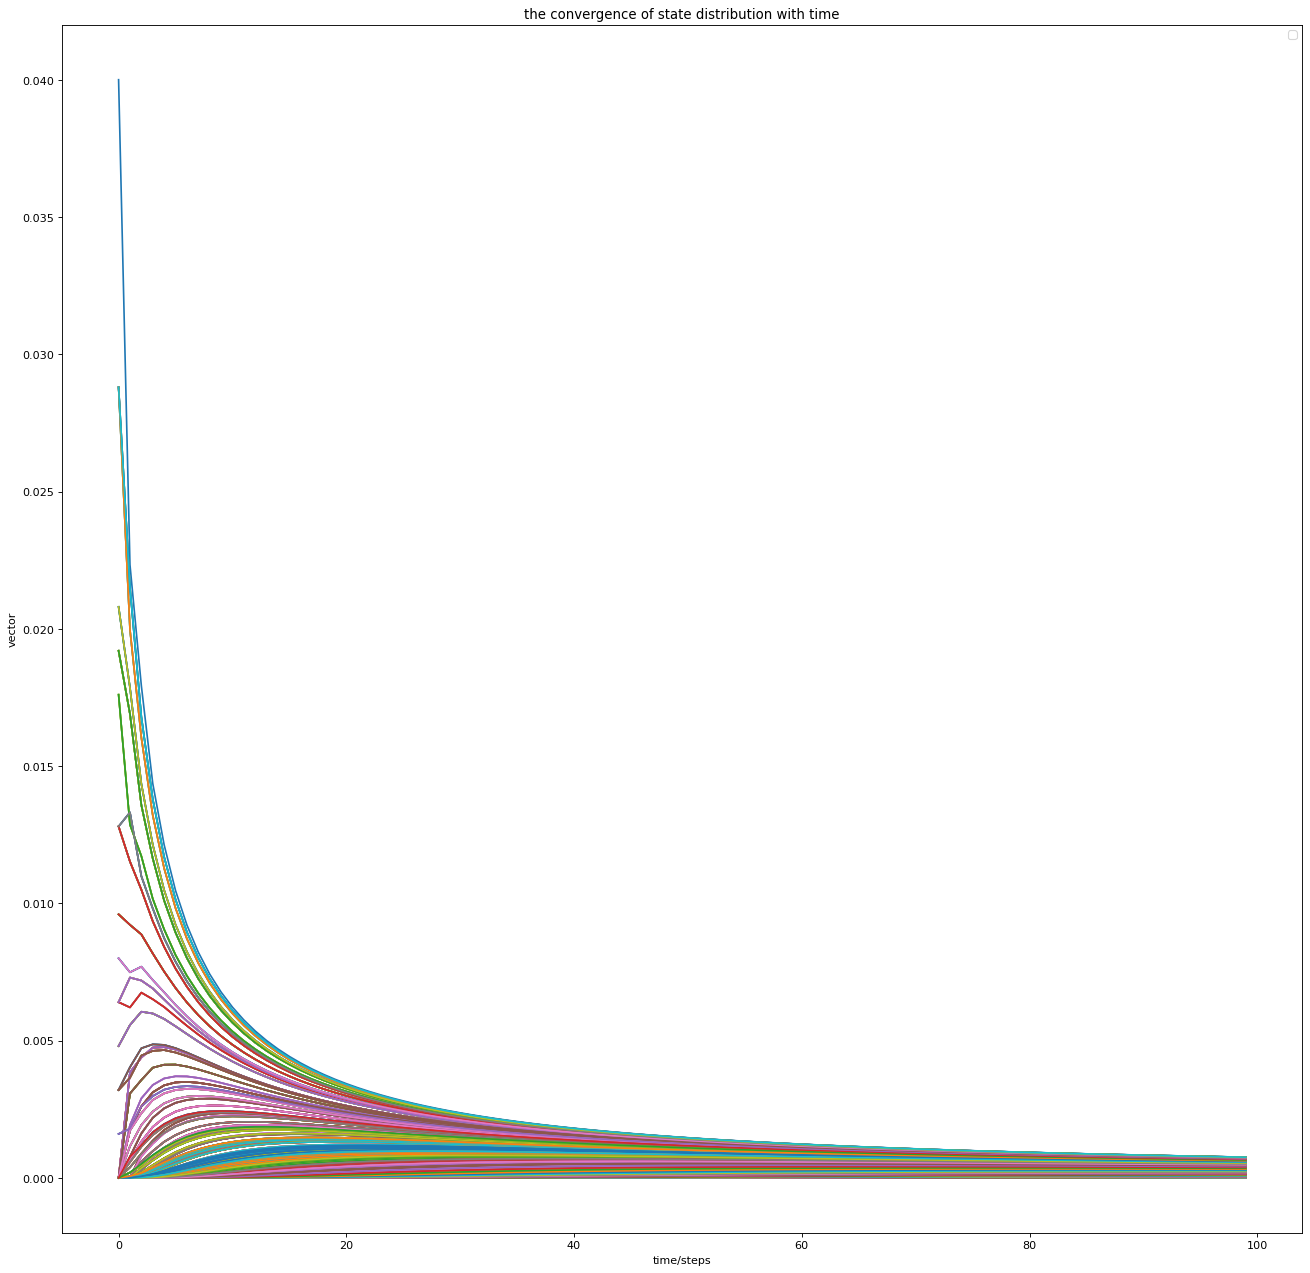

In [64]:
from numpy.linalg import matrix_power
from matplotlib.pyplot import figure
from tqdm import tqdm

k=[]
for z in range(160*160):
    k.append([0])
k[0] = [1]

current_matrix = matrix
times = 100
store = np.array([[0 for n in range(times)] for m in range(160*160)], dtype=float)
for time in tqdm(range(times)):
    current_matrix = np.dot(matrix, current_matrix)
    result = np.dot(current_matrix, k)
    for xx in range(160*160):
        store[xx][time] = float(result[[xx][0]])
print(store.shape)

x_grid = []
for yy in range(times):
    x_grid.append(yy)
figure(figsize=(20, 20), dpi=80)
for zz in range(160*160):
    plt.plot(x_grid, store[zz])
    plt.xlabel("time/steps")
    plt.ylabel("vector")
    plt.title("the convergence of state distribution with time")
    plt.figure
plt.legend()
plt.show()
after_100 = []
for xxx in range(160*160):
    after_100.append(store[xxx][-1])
maxx = max(after_100)
minn = min(after_100)



<h1>Part 4: Ising (The hexagonal part)

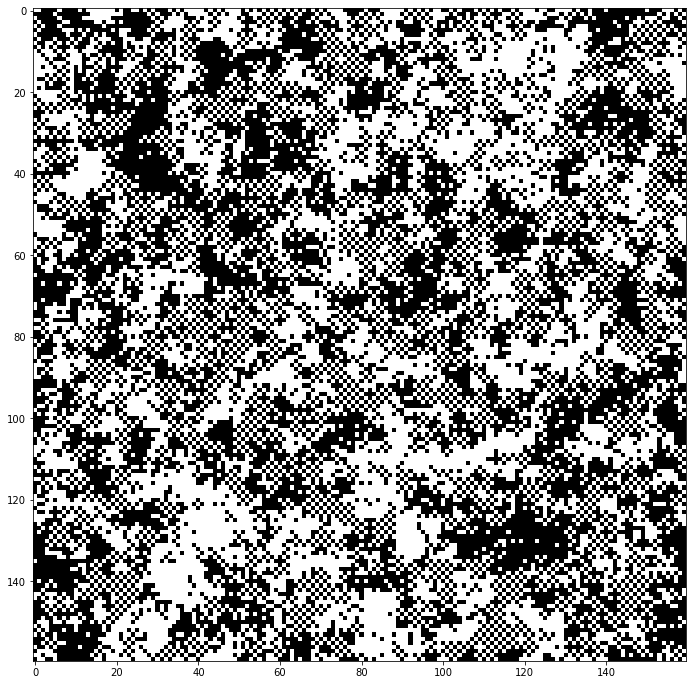

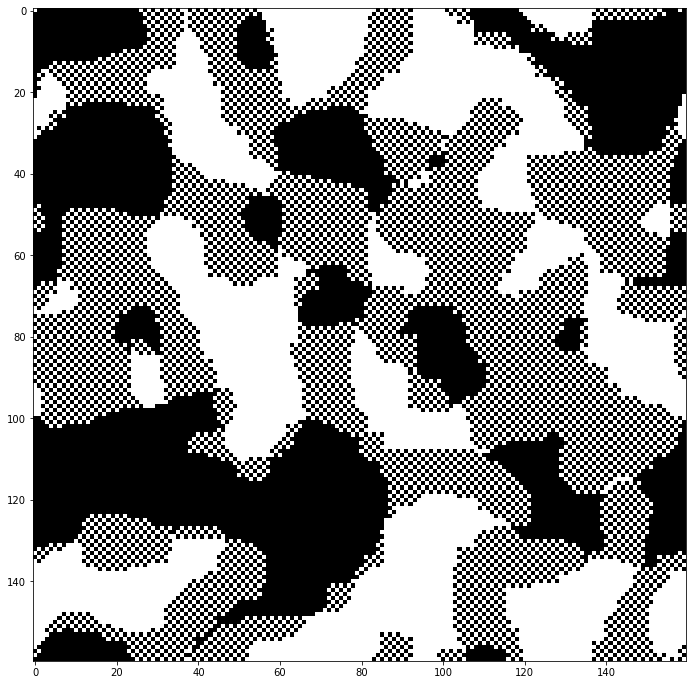

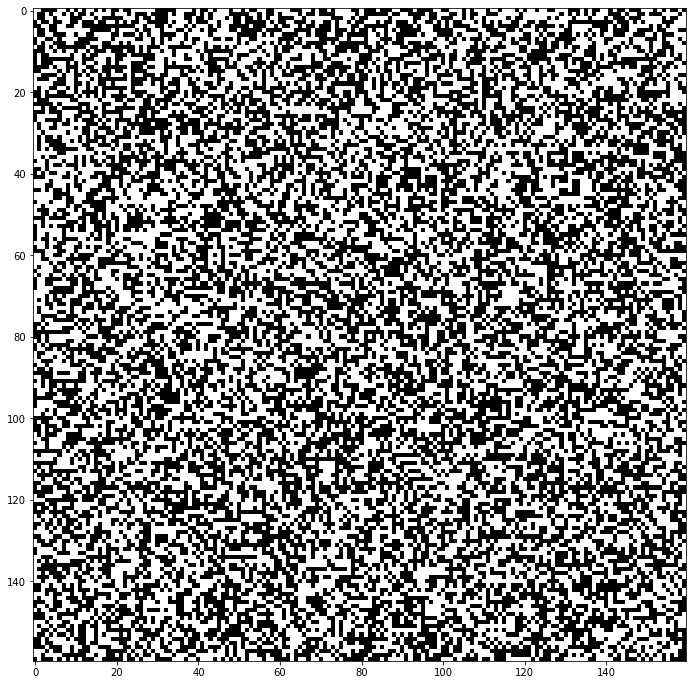

In [56]:
class Chessboard:
    def __init__(self, n=160, beta=2, hex=False):
        self.N = n
        self.beta = beta
        self.hex = hex
    def neibour(self, x, y):
        if not self.hex:
            directions = [(-1, 0), (1, 0), (0, 1), (0, -1)]
        elif x % 2 == 0:
            directions = [(-1, 0), (1, 0), (-1, 1), (1, 1), (0, 1), (0, -1)]
        else: 
            directions = [(-1, 0), (1, 0), (-1, -1), (1, -1), (0, 1), (0, -1)]
        return [((x+d[0]) % self.N, (y+d[1])%self.N) for d in directions]
    
    def simulate(self, seed, nsteps=128):
        np.random.seed(seed)
        coins = np.random.choice([-1, 1], (self.N, self.N), replace = True)
        V = np.zeros_like(coins)

        for t in range(nsteps):
            for i in range(self.N):
                for j in range(self.N):
                    V[i, j] = np.sum([coins[pos] for pos in self.neibour(i, j)])

            prob_head = np.exp(self.beta * V) / (np.exp(self.beta * V) + np.exp(-self.beta * V))
            for i in range(self.N):
                for j in range(self.N):
                    coins[i, j] = np.random.choice([1, -1], 1, p = [prob_head[i, j], 1-prob_head[i, j]])
        plt.figure(figsize=(12,12))
        plt.imshow(coins, cmap='gray', interpolation='none')
        plt.show()


chess_board_1 = Chessboard(n = 160, beta = 0.4, hex=False)
chess_board_1.simulate(0)

chess_board_2 = Chessboard(n = 160, beta = 2, hex=False)
chess_board_2.simulate(0)

chess_board_3 = Chessboard(n = 160, beta = 0.08, hex=False)
chess_board_3.simulate(0)